In [3]:
#Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
#Load dataset
df = pd.read_csv("Heart_disease_statlog.csv")

#Display absic info
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   70    1   3       130   322    0        2      109      0      2.4      1   
1   67    0   2       115   564    0        2      160      0      1.6      1   
2   57    1   1       124   261    0        0      141      0      0.3      0   
3   64    1   3       128   263    0        0      105      1      0.2      1   
4   74    0   1       120   269    0        2      121      1      0.2      0   

   ca  thal  target  
0   3     1       1  
1   0     3       0  
2   0     3       1  
3   1     3       0  
4   1     1       0  


In [5]:
# check for missing values
print("Missing values in dataset: ", df.isnull().sum())

Missing values in dataset:  age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


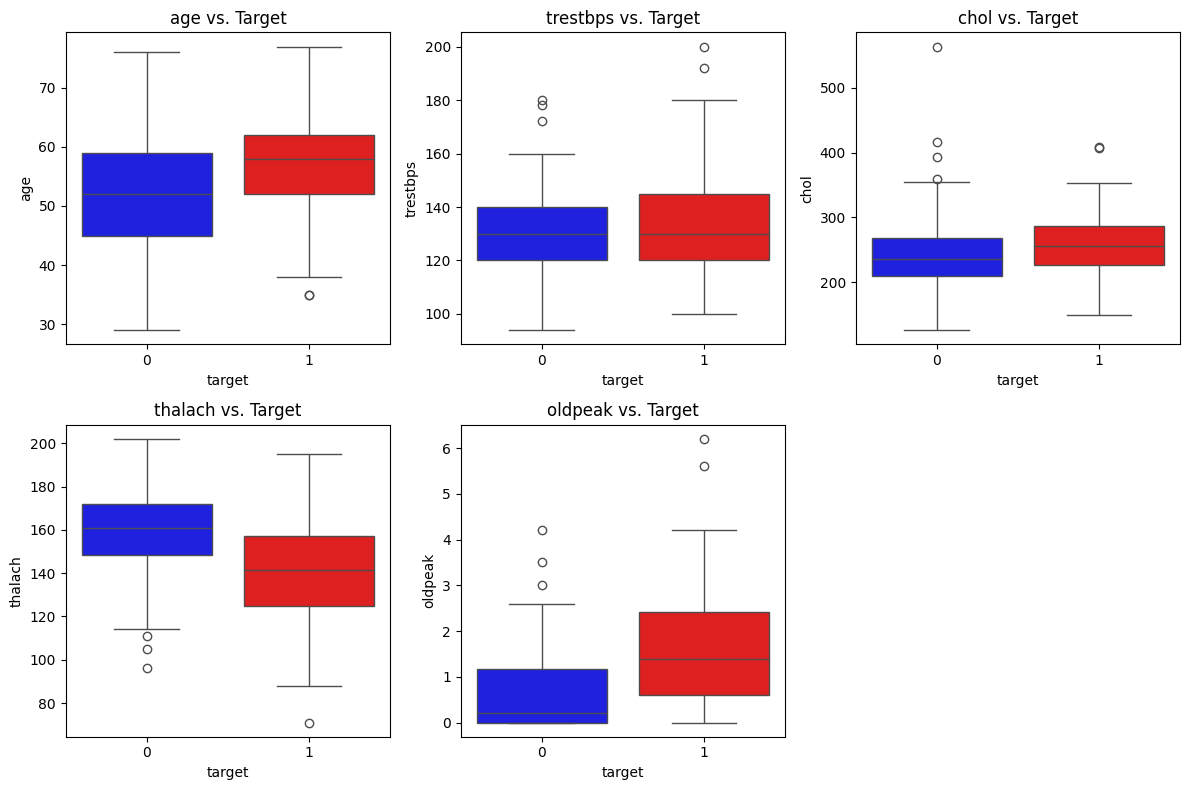

In [6]:
# List of numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='target', y=feature, data=df, hue='target', palette=['blue', 'red'], legend=False)
    plt.title(f"{feature} vs. Target")
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

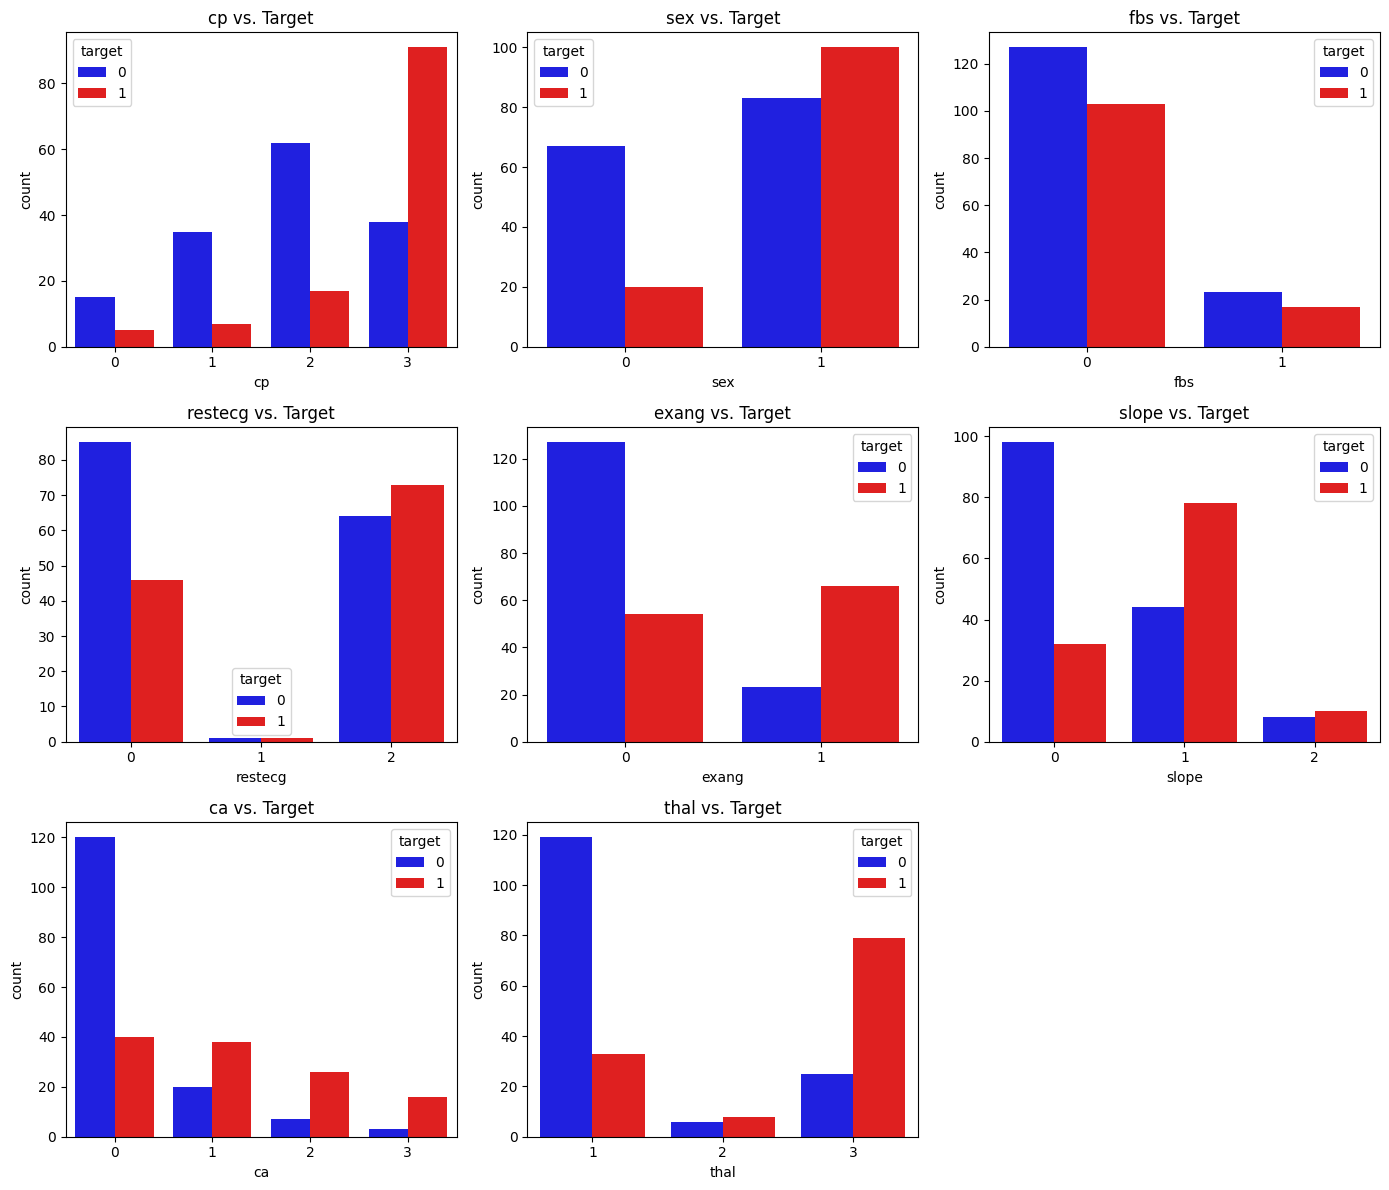

In [7]:
# categorical features
categorical_features = ['cp', 'sex', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

plt.figure(figsize=(12, 8))
plt.figure(figsize=(14, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df[feature], hue=df['target'], palette=['blue', 'red'])
    plt.title(f"{feature} vs. Target")
plt.tight_layout()
plt.show()

In [8]:
# Selected Features
new_numerical_features = ['thalach', 'oldpeak', 'age']
new_categorical_features = ['cp', 'ca', 'thal', 'exang', 'slope']
new_binary_features = ['restecg', 'sex']

# Define transformations
preprocessor = ColumnTransformer([
    ('num_scaling', StandardScaler(), new_numerical_features),  
    ('cat_encoding', OneHotEncoder(), new_categorical_features)  
], remainder='passthrough')

In [9]:
# Apply transformations
X = df[new_numerical_features + new_categorical_features + new_binary_features]  # Only selected features
y = df['target']

# split data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.fit_transform(X_test)

# Get new feature names after encoding
cat_encoded_features = preprocessor.named_transformers_['cat_encoding'].get_feature_names_out(new_categorical_features)

# Combine all feature names
feature_names = new_numerical_features + list(cat_encoded_features) + new_binary_features

# Convert to DataFrame
X_train_preprocessed = pd.DataFrame(X_train_transformed, columns=feature_names)
X_test_preprocessed = pd.DataFrame(X_test_transformed, columns=feature_names)

display(X_train_preprocessed.head())

,thalach,oldpeak,age,cp_0,cp_1,cp_2,cp_3,ca_0,ca_1,ca_2,...,thal_1,thal_2,thal_3,exang_0,exang_1,slope_0,slope_1,slope_2,restecg,sex
0,1.007469,-0.939241,-1.336180,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.551103,1.937160,-0.039034,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0
2,0.289273,-0.399916,-0.363321,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0
3,0.019950,0.678734,1.582397,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.159599,-0.579691,-0.039034,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0


In [10]:
# Initialize logistic regression model
logistic_regression = LogisticRegression(solver='saga', penalty="l2", C=1.4, max_iter=1000)

#train the model
logistic_regression.fit(X_train_preprocessed, y_train)

y_pred = logistic_regression.predict(X_test_preprocessed)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.8518518518518519


In [11]:
# let's try using polynomial features
from sklearn.preprocessing import PolynomialFeatures

# Select features and target
X = df[['thalach', 'oldpeak']].values
y = df['target'].values

# Step 1: Generate Polynomial Features for the training data (degree=2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)  # This creates polynomial features for the training set

# Step 2: Standardize the training data
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train the Logistic Regression model
logistic_regression = LogisticRegression(solver='saga', penalty='l2', C=6.5, max_iter=1000)
logistic_regression.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = logistic_regression.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.7222222222222222


In [12]:
# Let's try building a neural network for heart disease prediction
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
# Define a simple neural network model
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden Layer 1
    layers.Dense(8, activation='relu'),  # Hidden Layer 2
    layers.Dense(1, activation='sigmoid')  # Output Layer (Probability of heart disease)
])

/Users/moezakbar/miniforge3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7422 - loss: 0.5563 - val_accuracy: 0.7407 - val_loss: 0.5687
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7325 - loss: 0.5184 - val_accuracy: 0.7407 - val_loss: 0.5693
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7303 - loss: 0.5895 - val_accuracy: 0.7037 - val_loss: 0.5710
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7593 - loss: 0.5215 - val_accuracy: 0.7037 - val_loss: 0.5717
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7404 - loss: 0.5712 - val_accuracy: 0.7037 - val_loss: 0.5703
Epoch 6/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7586 - loss: 0.5220 - val_accuracy: 0.7037 - val_loss: 0.5749
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7393 - loss: 0.5439 - val_accuracy: 0.7037 - val_loss: 0.5708
Epoch 8/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7493 - loss: 0.5338 - val_accuracy: 0.

In [17]:
# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: ", accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7542 - loss: 0.5468
Accuracy:  0.7407407164573669
